# Abstract example of vector space model
We create a model for generating synthetic corpora from a limited vocabulary to illustrate the vector space model properties.

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
def doc(vocabulary, probs=None):
    if probs is None:
        p = np.random.poisson(10, len(vocabulary))
        probs = p / p.sum()
    doclen = np.random.poisson(20)
    document = np.random.choice(vocabulary, size=doclen, p=probs)
    return list(document)

In [3]:
vocabulary = ['A', 'B']
corpus = [doc(vocabulary) for i in range(1000)]
corpus += [doc(vocabulary, np.array([.8, .2])) for i in range(1000)]
corpus += [doc(vocabulary, np.array([.2, .8])) for i in range(1000)]

## Indexing

In [4]:
import matplotlib.pyplot as plt

### Boolean indexing

In [5]:
Ib = np.zeros((len(corpus), len(vocabulary)))
for i, d in enumerate(corpus):
    for j, w in enumerate(vocabulary):
        if w in d:
            Ib[i,j] = 1
Ib = pd.DataFrame(Ib, columns=vocabulary)

In [6]:
Ib.head()

,A,B
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


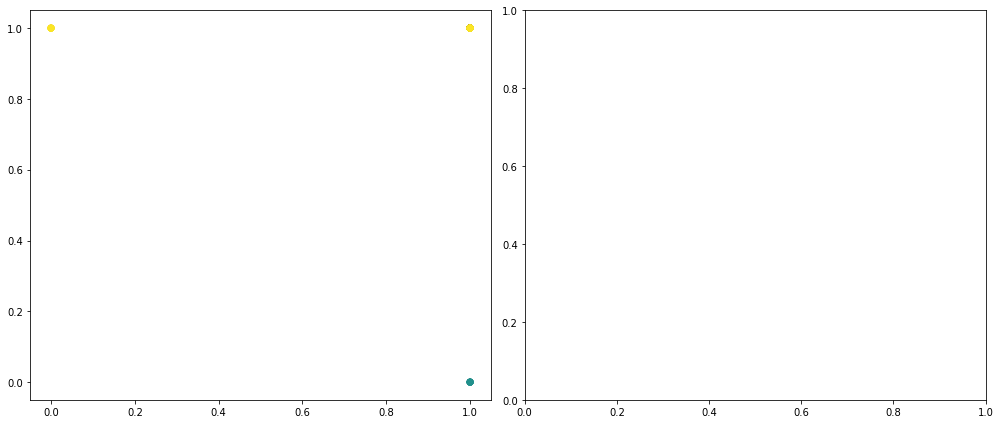

In [8]:
fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
labels = [0]*1000 + [1]*1000 + [2]*1000
ax[0].scatter(Ib.A, Ib.B, c=labels, alpha=.4)
#ax[1].scatter(Ic.A, Ic.B, c=y_pred, alpha=.4)
plt.tight_layout()
plt.show()

### Count indexing

In [ ]:
from collections import Counter

In [ ]:
Ic = np.zeros((len(corpus), len(vocabulary)))
for i, d in enumerate(corpus):
    for w, c in Counter(d).most_common():
        Ic[i, vocabulary.index(w)] = c
Ic = pd.DataFrame(Ic, columns=vocabulary)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
labels = [0]*1000 + [1]*1000 + [2]*1000
ax[0].scatter(Ib.A, Ib.B, c=labels, alpha=.4)
ax[1].scatter(Ic.A, Ic.B, c=labels, alpha=.4)
plt.tight_layout()
plt.show()

## Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(Ic)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
labels = [0]*1000 + [1]*1000 + [2]*1000
ax[0].scatter(Ic.A, Ic.B, c=labels, alpha=.4)
ax[1].scatter(Ic.A, Ic.B, c=y_pred, alpha=.4)
plt.tight_layout()
plt.show()

## Document similarity

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

In [ ]:
query = ['B', 'B', 'B', 'B']
vq = np.zeros(len(vocabulary))
for w, c in Counter(query).most_common():
    vq[vocabulary.index(w)] = c
vq

In [ ]:
Ed = euclidean_distances(vq.reshape(1, -1), Ic)[0]
Cd = cosine_distances(vq.reshape(1, -1), Ic)[0]

In [ ]:
Eds = pd.Series(Ed, index=range(len(Ed)))
Cds = pd.Series(Cd, index=range(len(Cd)))

In [ ]:
top_similar = lambda i, t: list(i.sort_values()[:t].keys())

In [ ]:
for d in top_similar(Eds, 5):
    print(" ".join(corpus[d]))

In [ ]:
for d in top_similar(Cds, 5):
    print(" ".join(corpus[d]))